In [23]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD,RMSprop,Adam
import numpy as np
import matplotlib.pyplot as plt

In [35]:
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(20,kernel_size=5,padding='same',input_shape=input_shape))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(Conv2D(50,kernel_size=(5,5),border_mode='same'))
        model.add(Activation('relu'))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation('relu'))
        model.add(Dense(classes))
        model.add((Activation('softmax')))
        return model

In [3]:
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT = 0.2
IMG_ROWS, IMG_COLS = 28,28
NB_CLASSES = 10
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
K.set_image_dim_ordering('th')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [7]:
X_train = X_train[:,np.newaxis,:,:]
X_test = X_test[:,np.newaxis,:,:]

In [8]:
X_train.shape

(60000, 1, 28, 28)

In [13]:
y_train = np_utils.to_categorical(y_train,NB_CLASSES)
y_test = np_utils.to_categorical(y_test,NB_CLASSES)

In [15]:
y_train.shape

(60000, 10)

In [36]:
model = LeNet.build(input_shape=INPUT_SHAPE,classes=NB_CLASSES)
model.compile(loss='categorical_crossentropy',optimizer=OPTIMIZER,metrics=['accuracy'])
history = model.fit(X_train,y_train,batch_size=BATCH_SIZE,epochs=NB_EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, padding="same", kernel_size=(5, 5))`


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 22s 457us/step - loss: 0.1817 - acc: 0.9458 - val_loss: 0.0601 - val_acc: 0.9807
Epoch 2/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0507 - acc: 0.9840 - val_loss: 0.0517 - val_acc: 0.9842
Epoch 3/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0329 - acc: 0.9896 - val_loss: 0.0443 - val_acc: 0.9858
Epoch 4/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0223 - acc: 0.9925 - val_loss: 0.0404 - val_acc: 0.9888
Epoch 5/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0179 - acc: 0.9941 - val_loss: 0.0400 - val_acc: 0.9886
Epoch 6/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0133 - acc: 0.9960 - val_loss: 0.0347 - val_acc: 0.9900
Epoch 7/20
48000/48000 [==============================] - 5s 99us/step - loss: 0.0098 - acc: 0.9966 - val_loss: 0.0394 - val_a

In [38]:
score = model.evaluate(X_test,y_test,verbose=VERBOSE)
print('Test score',score[0])
print('Test accuracy',score[1])

10000/10000 [==============================] - 1s 81us/step
Test score 0.04142384915732532
Test accuracy 0.9915


In [39]:
print(history.history.keys())

dict_keys(['val_acc', 'loss', 'acc', 'val_loss'])


In [40]:
# define the function
import matplotlib.pyplot as plt
%matplotlib inline
def training_vis(hist):
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    acc = hist.history['acc']
    val_acc = hist.history['val_acc']

    # make a figure
    fig = plt.figure(figsize=(12,4))
    # subplot loss
    ax1 = fig.add_subplot(121)
    ax1.plot(loss,label='train_loss')
    ax1.plot(val_loss,label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Loss on Training and Validation Data')
    ax1.legend()
    # subplot acc
    ax2 = fig.add_subplot(122)
    ax2.plot(acc,label='train_acc')
    ax2.plot(val_acc,label='val_acc')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.set_title('Accuracy  on Training and Validation Data')
    ax2.legend()
    plt.tight_layout()

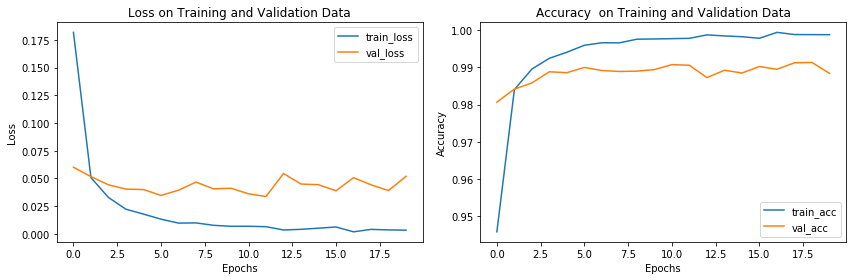

In [41]:
training_vis(history)